In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

## Решение уранения теплопроводности методом конечных элементов

Уравнение теплопроводности имеет вид:

\begin{equation}
\frac{\partial u(x,y,z,t)}{\partial t} = \alpha^2 \Delta u(x,y,z,t) + f(x,y,z,t)
\end{equation}

В одномерном случае:

\begin{equation}
\frac{\partial u(x,t)}{\partial t} = \alpha^2 \Delta u(x,t) + f(x,t)
\end{equation}

С краевыми условиями:

\begin{equation}
u(x,0) = u_0 (x); x \in [0, L]
\end{equation}
\begin{equation}
u(0,t) = u(L,t) = 0
\end{equation}
или
\begin{equation}
u(0,t) = \frac{\partial}{\partial x}u(L,t) = 0
\end{equation}

В вариационном виде:

\begin{equation}
\int_0^L \left(\frac{\partial u(x,t)}{\partial t} - \alpha^2 \Delta u(x,t) - f(x,t)\right)vdx = 0
\end{equation}

Теорема Грина:
$$
\oint_C(Pdx+Qdy) = \iint_D \left( \frac{\partial Q}{\partial x} - \frac{\partial P }{\partial y} \right)dxdy
$$

Интегрирование по частям для интегралов, содержащих частные производные 

Пусть имеется некоторая область $ \mathbf{\Omega}$ ограниченная $ \partial \mathbf{\Omega}$ в пространстве $L_2(\mathbf{\Omega})$
имеющее скалярное произведение и норму - $$ (u,v) = \int_\Omega uv d\Omega $$ $$ \|u\| = \left( \int_{\Omega} u^2 d\Omega \right)^{\frac{1}{2}} $$
$$ \|u\| = \left( \int_{\Omega} u^2 + |\Delta u|^2 d\Omega \right)^{\frac{1}{2}} $$

И пусть имеется внешняя единичная нормаль $\mathbf{n}$ к некоторой кривой $S$, где - $\frac{\partial u}{\partial \mathbf{n}}$ производная по направлению

Правило произведения для умножения на скаляр дивергенции   
\begin{equation}
\nabla \cdot (a \mathbf{V}) = a \nabla\cdot \mathbf{V} + (\nabla a) \cdot \mathbf{V}
\end{equation}

Выведем уравнение интегрирования по частям 

$$V = \nabla  v$$ 
$$\nabla \cdot (u \nabla  v) = u \nabla \cdot \nabla v + (\nabla u) \cdot \nabla v$$
$$\nabla \cdot (u \nabla  v) = u \Delta v + \nabla u \nabla v$$

Проинтегрируем по всей области $\Omega$

$$\int_{\Omega}\nabla \cdot (u \nabla  v) d\Omega = \int_{\Omega}u \Delta v d\Omega + \int_{\Omega} \nabla u \nabla v d\Omega$$

Теорема Остроградского – Гаусса:
$$\int_{\Omega}\nabla \cdot u\nabla v d\Omega = \int_{\partial \Omega}  u\nabla (v\cdot \mathbf{n}) d(\partial \Omega)$$

Соединяя получаем первую формулу Грина:
$$\int_{\Omega}u \Delta v d\Omega + \int_{\Omega} \nabla u \nabla v d\Omega = \int_{\partial \Omega}  u\nabla (v\cdot \mathbf{n})  d(\partial \Omega)$$
$$\int_{\Omega}u \Delta v d\Omega + \int_{\Omega} \nabla u \nabla v d\Omega = \int_{\partial \Omega}  u \frac{\partial v}{\partial \mathbf{n}}  d(\partial \Omega)$$


Возвращаясь к вариационной постановке задачи
\begin{equation}
\alpha^2\int_{\Omega}  (\Delta u) vd \Omega = -\alpha^2\int_{\Omega}  \nabla u \nabla vd \Omega + \alpha^2\int_{\partial \Omega}  v \frac{\partial u}{\partial \mathbf{n}}  d(\partial \Omega)
\end{equation}

И что бы перейти к $\mathcal{H}_E$ зануляется значение на границах области $\int_{\partial \Omega}  v \frac{\partial u}{\partial \mathbf{n}}  d(\partial \Omega) $

\begin{equation}
\int_{\Omega} \left(\frac{\partial u}{\partial t} v + \alpha^2 \nabla u \nabla v - fv\right)d\Omega - \alpha^2\int_{\partial \Omega}  v \frac{\partial u}{\partial \mathbf{n}}  d(\partial \Omega) = 0
\end{equation}

В одномерном случае
$$\int_0^L(u_tv+\alpha^2u_{x}v_x-fv)dx = 0$$

Решения будем искать в виде линейной комбинации следующего вида:
$$u^h = \sum_{i}^N Q_i(t)\phi_i(x)$$
для всех $u^h$ из $\mathcal{H}_E$ при $t>0$

## Из метода Бубнова - Галеркина

$$Au=f$$
$$u_n = \sum_i^N a_i\phi_i$$
$$(Au_n, v_n)=(f,v_n)$$
$$(Au_n-f, \phi_i)=0, i = 0..N$$
СЛАУ
$$\sum_j^N (A\phi_j, \phi_i) a_j = (f,\phi_i), i = 1..N$$

В одномерном случае
$$\int_0^L(u_tv+\alpha^2u_{x}v_x-fv)dx = 0$$

$$u^h = \sum_{i}^N Q_i(t)\phi_i(x)$$

$$\int_0^L(\partial_tu v+\alpha^2\partial_{x}u\partial_{x}v-fv)dx = 0$$

$$\int_0^L \sum_{i}^N \partial_tQ_i(t)\phi_i(x) \sum_{j}^N Q_j(t)\phi_j(x)+\alpha^2\partial_{x}\sum_{i}^N Q_i(t)\phi_i(x)\partial_{x}\sum_{j}^N Q_j(t)\phi_j(x)-f\sum_{j}^N Q_j(t)\phi_j(x)dx = 0$$

$$\int_0^L \sum_{i}^N \partial_tQ_i(t)\phi_i(x) \sum_{j}^N Q_j(t)\phi_j(x)+\alpha^2\sum_{i}^N Q_i(t)\partial_{x}\phi_i(x)\sum_{j}^N Q_j(t)\partial_{x}\phi_j(x)-f\sum_{j}^N Q_j(t)\phi_j(x)dx = 0$$

$$\int_0^L \sum_{i}^N \partial_tQ_i(t)\phi_i(x) \sum_{j}^N Q_j(t)\phi_j(x)+\alpha^2\sum_{i}^N Q_i(t)\partial_{x}\phi_i(x)\sum_{j}^N Q_j(t)\partial_{x}\phi_j(x)dx = \int_0^Lf\sum_{j}^N Q_j(t)\phi_j(x)dx$$

$$\int_0^L \sum_{i}^N \partial_tQ_i(t)\phi_i(x) Q_j(t)\phi_j(x)+\alpha^2\sum_{i}^N Q_i(t)\partial_{x}\phi_i(x) Q_j(t)\partial_{x}\phi_j(x)dx = \int_0^Lf Q_j(t)\phi_j(x)dx$$
$$j = 0..N$$

Получаем СЛАУ:
$$\int_0^L \sum_{i}^N \partial_tQ_i(t)\phi_i(x) \phi_j(x)+\alpha^2\sum_{i}^N Q_i(t)\partial_{x}\phi_i(x) \partial_{x}\phi_j(x)dx = \int_0^Lf \phi_j(x)dx$$
$$j = 0..N$$

Перейдем к векторной записи:
$$\sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_j(x)dx+\alpha^2 Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_j(x)dx = \int_0^Lf \phi_j(x))dx$$
$$j = 0..N$$

$$\sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_j(x)dx+\alpha^2 Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_j(x)dx = \int_0^Lf \phi_j(x))dx$$
$$j = 1..N$$

\begin{equation}
\begin{pmatrix}
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_0(x)dx+\alpha^2 Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_0(x)dx \\
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_1(x)dx+\alpha^2 Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_1(x)dx \\
  \vdots  \\
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_N(x)dx+\alpha^2 Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_N(x)dx 
 \end{pmatrix} = 
 \begin{pmatrix}
  \int_0^Lf \phi_0(x))dx \\
  \int_0^Lf \phi_1(x))dx \\
  \vdots  \\
  \int_0^Lf \phi_N(x))dx 
 \end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_0(x)dx\\
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_1(x)dx\\
  \vdots  \\
  \sum_{i}^N  \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_N(x)dx
 \end{pmatrix} +
 \alpha^2 \begin{pmatrix}
  \sum_{i}^N   Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_0(x)dx \\
  \sum_{i}^N   Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_1(x)dx \\
  \vdots  \\
  \sum_{i}^N   Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_N(x)dx 
 \end{pmatrix} = 
 \begin{pmatrix}
  \int_0^Lf \phi_0(x))dx \\
  \int_0^Lf \phi_1(x))dx \\
  \vdots  \\
  \int_0^Lf \phi_N(x))dx 
 \end{pmatrix}
\end{equation}

\begin{equation}
\sum_{i}^N \begin{pmatrix}
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_0(x)dx\\
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_1(x)dx\\
  \vdots  \\
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_N(x)dx
 \end{pmatrix} +
  \alpha^2 \sum_{i}^N \begin{pmatrix}
     Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_0(x)dx \\
    Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_1(x)dx \\
  \vdots  \\
    Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_N(x)dx 
 \end{pmatrix} = 
 \begin{pmatrix}
  \int_0^Lf \phi_0(x))dx \\
  \int_0^Lf \phi_1(x))dx \\
  \vdots  \\
  \int_0^Lf \phi_N(x))dx 
 \end{pmatrix}
\end{equation}

\begin{equation}
\sum_{i}^N \begin{pmatrix}
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_0(x)dx\\
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_1(x)dx\\
  \vdots  \\
   \partial_tQ_i(t) \int_0^L \phi_i(x) \phi_N(x)dx
 \end{pmatrix}=
 \begin{pmatrix}
   \partial_tQ_0(t) \int_0^L \phi_0(x) \phi_0(x)dx\\
   \partial_tQ_0(t) \int_0^L \phi_0(x) \phi_1(x)dx\\
  \vdots  \\
   \partial_tQ_0(t) \int_0^L \phi_0(x) \phi_N(x)dx
 \end{pmatrix} +
  \begin{pmatrix}
   \partial_tQ_1(t) \int_0^L \phi_1(x) \phi_0(x)dx\\
   \partial_tQ_1(t) \int_0^L \phi_1(x) \phi_1(x)dx\\
  \vdots  \\
   \partial_tQ_1(t) \int_0^L \phi_1(x) \phi_N(x)dx
 \end{pmatrix}+...+
  \begin{pmatrix}
   \partial_tQ_N(t) \int_0^L \phi_N(x) \phi_0(x)dx\\
   \partial_tQ_N(t) \int_0^L \phi_N(x) \phi_1(x)dx\\
  \vdots  \\
   \partial_tQ_N(t) \int_0^L \phi_N(x) \phi_N(x)dx
 \end{pmatrix}=
\end{equation}

\begin{equation}
 =\begin{pmatrix}
   \int_0^L \phi_0(x) \phi_0(x)dx & \int_0^L \phi_1(x) \phi_0(x)dx & \cdots & \int_0^L \phi_N(x) \phi_0(x)dx\\
    \int_0^L \phi_0(x) \phi_1(x)dx & \int_0^L \phi_1(x) \phi_1(x)dx & \cdots & \int_0^L \phi_N(x) \phi_1(x)dx\\
  \vdots & \vdots  & \ddots & \vdots  \\ \\
    \int_0^L \phi_0(x) \phi_N(x)dx & \int_0^L \phi_1(x) \phi_N(x)dx & \cdots & \int_0^L \phi_N(x) \phi_N(x)dx
 \end{pmatrix}
  \begin{pmatrix}
   \partial_tQ_0(t) \\
   \partial_tQ_1(t) \\
  \vdots  \\
   \partial_tQ_N(t)
 \end{pmatrix}
\end{equation}

\begin{equation}
K =
 \begin{pmatrix}
   \int_0^L \phi_0(x) \phi_0(x)dx & \int_0^L \phi_1(x) \phi_0(x)dx & \cdots & \int_0^L \phi_N(x) \phi_0(x)dx\\
    \int_0^L \phi_0(x) \phi_1(x)dx & \int_0^L \phi_1(x) \phi_1(x)dx & \cdots & \int_0^L \phi_N(x) \phi_1(x)dx\\
  \vdots & \vdots  & \ddots & \vdots  \\ \\
    \int_0^L \phi_0(x) \phi_N(x)dx & \int_0^L \phi_1(x) \phi_N(x)dx & \cdots & \int_0^L \phi_N(x) \phi_N(x)dx
 \end{pmatrix}
\end{equation}

\begin{equation}
K_{i,j} = \int_0^L \phi_i(x) \phi_j(x)dx
\end{equation}

\begin{equation}
  \alpha^2 \sum_{i}^N \begin{pmatrix}
     Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_0(x)dx \\
    Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_1(x)dx \\
  \vdots  \\
    Q_i(t)\int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_N(x)dx 
 \end{pmatrix} = 
 \alpha^2 \begin{pmatrix}
   \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_0(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_0(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_0(x)dx \\
    \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_1(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_1(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_1(x)dx \\
  \vdots & \vdots  & \ddots & \vdots  \\ \\
    \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_N(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_N(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_N (x)dx 
 \end{pmatrix}
  \begin{pmatrix}
   Q_0(t) \\
   Q_1(t) \\
  \vdots  \\
   Q_N(t)
 \end{pmatrix}
\end{equation}

\begin{equation}
M = 
\begin{pmatrix}
   \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_0(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_0(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_0(x)dx \\
    \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_1(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_1(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_1(x)dx \\
  \vdots & \vdots  & \ddots & \vdots  \\ \\
    \int_0^L\partial_{x}\phi_0(x) \partial_{x}\phi_N(x)dx & \int_0^L\partial_{x}\phi_1(x) \partial_{x}\phi_N(x)dx & \cdots & \int_0^L\partial_{x}\phi_N(x) \partial_{x}\phi_N (x)dx 
 \end{pmatrix}
\end{equation}

\begin{equation}
M_{i,j} = \int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_j(x)dx
\end{equation}

\begin{equation}
F =  \begin{pmatrix}
  \int_0^Lf \phi_0(x))dx \\
  \int_0^Lf \phi_1(x))dx \\
  \vdots  \\
  \int_0^Lf \phi_N(x))dx 
 \end{pmatrix}
\end{equation}

И в конечном виде:
\begin{equation}
K\partial_t Q + \alpha^2 M Q = F
\end{equation}

Для дифференцирования по времени используем метод Кранка-Николсона:
\begin{equation}
\frac{\partial u}{\partial t} + Au = f
\end{equation}
\begin{equation}
u(i\Delta x, n\Delta t) = u_i^n 
\end{equation}

Операторы $K$ и $M$ - от времени явно не зависят.

\begin{equation}
K\partial_t Q + \alpha^2 M Q = F
\end{equation}
\begin{equation}
\partial_t Q =  K^{-1}(F - \alpha^2 M Q)
\end{equation}

\begin{equation}
\frac{Q^{n+1} - Q^n}{\Delta t} =  \frac{1}{2}\left(K^{-1}(F - \alpha^2 M Q^n) + K^{-1}(F - \alpha^2 M Q^{n+1})\right)
\end{equation}

\begin{equation}
K\partial_t Q + \alpha^2 M Q = F
\end{equation}

forward Euler
\begin{equation}
K\frac{Q^{n+1}-Q^n}{dt} + \alpha^2 M Q^n = F^n
\end{equation}

backward Euler
\begin{equation}
K\frac{Q^{n+1}-Q^n}{dt} + \alpha^2 M Q^{n+1} = F^{n+1}
\end{equation}

усреднение 
\begin{equation}
K\frac{Q^{n+1}-Q^n}{dt}  + \alpha^2 \frac{1}{2}M Q^{n+1}+  \alpha^2 \frac{1}{2}M Q^n = \frac{1}{2}F^n + \frac{1}{2}F^{n+1}
\end{equation}

\begin{equation}
KQ^{n+1} + \alpha^2 \frac{dt}{2} M Q^{n+1} - KQ^n +  \alpha^2 \frac{dt}{2}M Q^n = \frac{dt}{2}(F^n + F^{n+1})
\end{equation}

\begin{equation}
(K + \alpha^2 \frac{dt}{2} M) Q^{n+1} - (K-\alpha^2 \frac{dt}{2}M) Q^n = \frac{dt}{2}(F^n + F^{n+1})
\end{equation}

\begin{equation}
(K + \alpha^2 \frac{dt}{2} M) Q^{n+1}  = \frac{dt}{2}(F^n + F^{n+1}) + (K-\alpha^2 \frac{dt}{2}M) Q^n
\end{equation}

In [13]:
def psi(x_i, x, i, N, h):
    """x - array, i - num of x and function psi_i(x_i), пробная(базисная) функция"""
    if i == 0:
        if x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        elif x_i >= x[i+1]:
            return 0
    elif i == N:
        if x_i >= x[i-1] and x_i <= x[N]:
            return (x_i - x[N-1]) / h
        else:
            return 0
    else:        
        if x_i <= x[i-1]:
            return 0
        elif x_i >= x[i-1] and x_i <= x[i]:
            return (x_i - x[i-1]) / h
        elif x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        else:
            return 0
    


\begin{equation}
M_{i,j} = \int_0^L\partial_{x}\phi_i(x) \partial_{x}\phi_j(x)dx
\end{equation}

In [53]:
def M(i,j,x,h,N):
    psi_i = np.zeros((N))
    psi_j = np.zeros((N))
    diff_psi_i = np.zeros((N))
    diff_psi_j = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    diff_psi_i[1:] = np.diff(psi_i)/h
    diff_psi_j[1:] = np.diff(psi_j)/h
    return sum(diff_psi_i*diff_psi_j)*h

\begin{equation}
K_{i,j} = \int_0^L \phi_i(x) \phi_j(x)dx
\end{equation}

In [54]:
def K(i,j,x,h,N):
    psi_i = np.zeros((N))
    psi_j = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    return sum(psi_i*psi_j)*h

\begin{equation}
F^n_{j} = \int_0^Lf^n\phi_j(x)dx
\end{equation}

In [55]:
def F(f,j,x,h,N):
    psi_j = np.zeros((N))
    for n in range(0,N):
        psi_j[n] = psi(x[n], x, j, N, h)
    return sum(f*psi_j)*h

In [56]:
alpha = 1

In [201]:
N = 20
T = 50
L = np.pi
x = np.linspace(0, L, N)
dx = x[1]-x[0]
dt = (dx**2)
t = np.linspace(0, dt*T, T)
h = dx

In [202]:
Q = np.zeros((N,T))
F_mtrx = np.zeros((N,T))
M_mtrx = np.zeros((N,N))
K_mtrx = np.zeros((N,N))

In [203]:
source = np.zeros((N,T))

In [204]:
for i in range(0, N):
    for j in range(0, N):
        M_mtrx[i,j] = M(i,j,x,h,N)
        K_mtrx[i,j] = K(i,j,x,h,N)

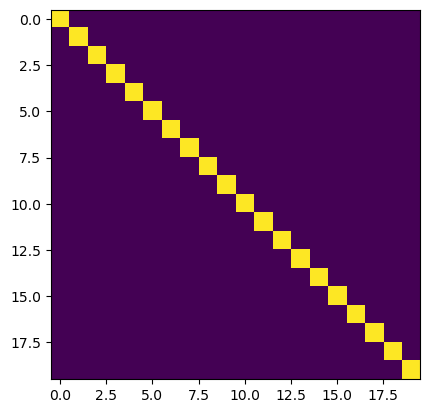

In [205]:
plt.imshow(K_mtrx)

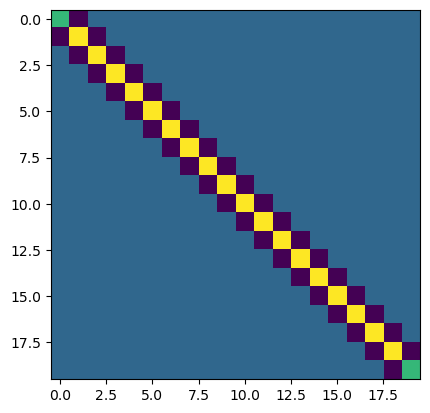

In [206]:
plt.imshow(M_mtrx)

\begin{equation}
(K + \alpha^2 \frac{dt}{2} M) Q^{n+1}  = \frac{dt}{2}(F^n + F^{n+1}) + (K-\alpha^2 \frac{dt}{2}M) Q^n
\end{equation}

In [207]:
Q[:,0] = np.sin(x[:])

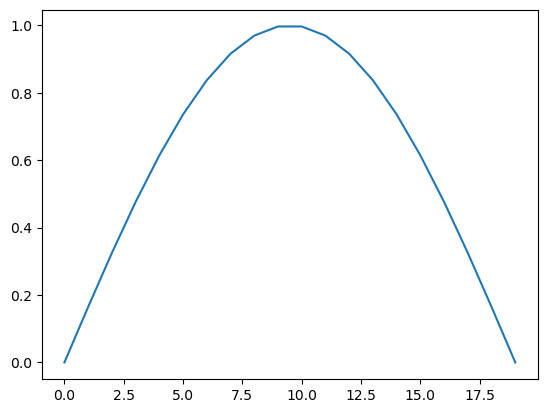

In [208]:
plt.plot(Q[:,0])

In [209]:
Matrix_plus = K_mtrx + (alpha**2)*(dt/2)*M_mtrx
Matrix_minus = K_mtrx - (alpha**2)*(dt/2)*M_mtrx

In [210]:
for n in range(0, T-1):
    rp = (dt/2)*(F_mtrx[:,n]+F_mtrx[:,n+1]) + Matrix_minus.dot(Q[:,n])
    Q[:,n+1] = np.linalg.solve(Matrix_plus, rp)

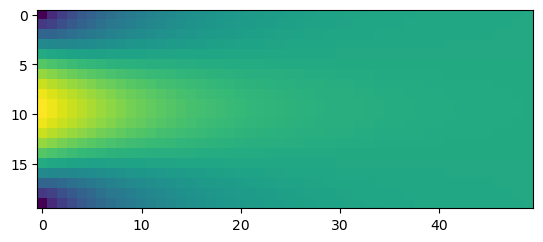

In [211]:
plt.imshow(Q)

$$u^h = \sum_{i}^N Q_i(t)\phi_i(x)$$

In [212]:
psi_vec = np.zeros((N,N))
for i in range(0, N):
    for n in range(0,N):
        psi_vec[i,n] = psi(x[i], x, n, N, h)

In [213]:
u = np.zeros((N,T))

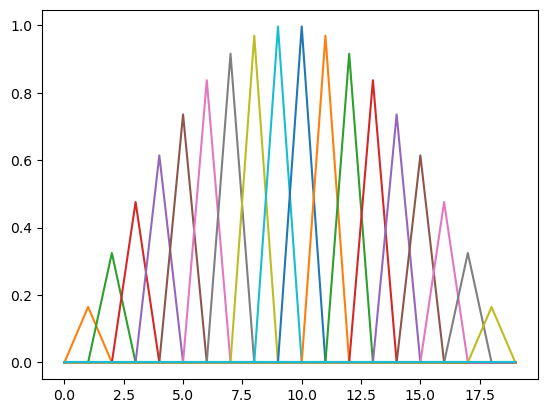

In [214]:
plt.plot(Q[:,0]*psi_vec[:,:])

In [215]:
for i in range(0, N):
    for n in range(0, T):
        u[:,n] = u[:,n] + Q[i,n] * psi_vec[i,:]

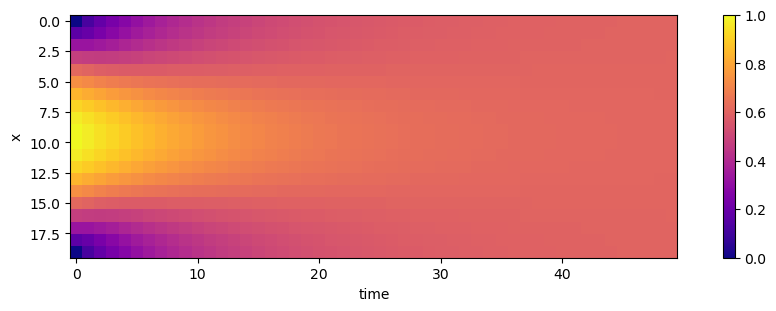

In [258]:
fig, axs = plt.subplots(figsize=(10,3), constrained_layout=True)
p1 = axs.imshow(u, cmap='plasma', aspect='equal', vmin=0, vmax=1)
plt.xlabel('time')
plt.ylabel('x')
fig.colorbar(p1)

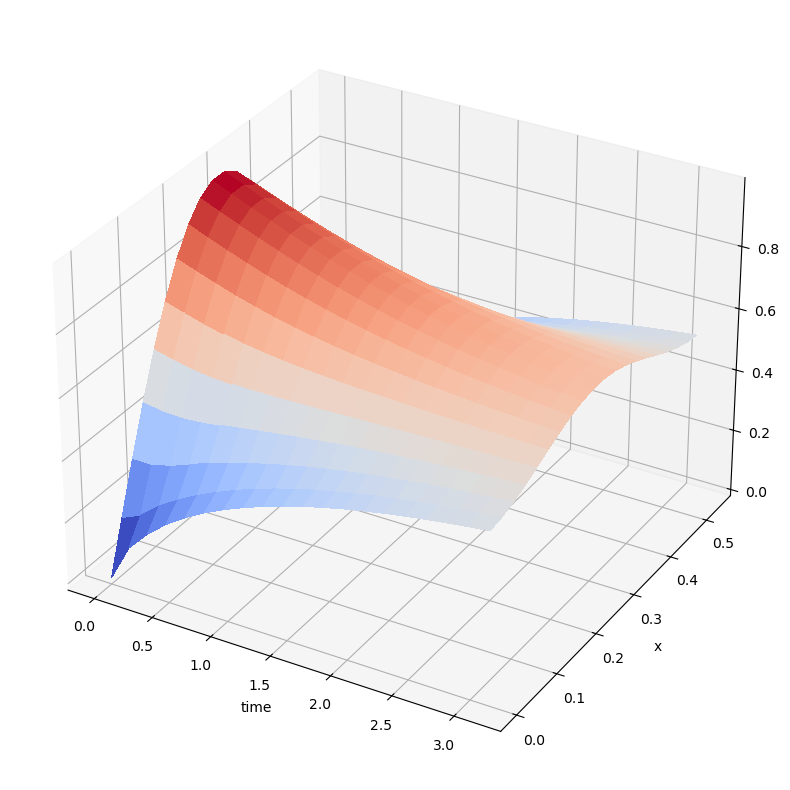

In [237]:
from matplotlib import cm
xgrid, tgrid = np.meshgrid(x, t[:20])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
plt.xlabel('time')
plt.ylabel('x')
surf = ax.plot_surface(xgrid, tgrid, u[:,:20],cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

Задача

$$\partial_tu=4\partial_{xx}, u(x,0) = \sin{(\pi x)}, u(0,t) = u(1,t) = 0$$

Аналитическое решение:
$$u(x,t) = e^{-4 \pi^2 t}\sin{(\pi x)}$$

In [532]:
def M(i,j,x,h,N):
    psi_i = np.zeros((N))
    psi_j = np.zeros((N))
    diff_psi_i = np.zeros((N))
    diff_psi_j = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    if i != j:
        psi_i[0] = 0
        psi_i[-1] = 0
        psi_j[0] = 0
        psi_j[-1] = 0
    diff_psi_i[1:] = np.diff(psi_i)/h
    diff_psi_j[1:] = np.diff(psi_j)/h
    return sum(diff_psi_i*diff_psi_j)*h

In [533]:
def K(i,j,x,h,N):
    psi_i = np.zeros((N))
    psi_j = np.zeros((N))
    for n in range(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    if i != j:
        psi_i[0] = 0
        psi_i[-1] = 0
        psi_j[0] = 0
        psi_j[-1] = 0
    return sum(psi_i*psi_j)*h

In [534]:
alpha = 2
N = 20
T = 50
L = 1
x = np.linspace(0, L, N)
dx = x[1]-x[0]
dt = (dx**2)
t = np.linspace(0, dt*T, T)
h = dx

In [535]:
u_analytical = np.zeros((N,T))
for i in range(0,N):
    for j in range(0,T):
        u_analytical[i,j] = np.exp(-4*np.pi**2*t[j])*np.sin(np.pi*x[i])
# u_analytical = (lambda x, t: np.exp(-4*np.pi**2*t)*np.sin(np.pi*x), x, t)
# u_analytical[:,:] = np.exp(-4*np.pi**2*t[:])*np.sin(np.pi*x[:])

In [536]:
Q = np.zeros((N,T))
F_mtrx = np.zeros((N,T))
M_mtrx = np.zeros((N,N))
K_mtrx = np.zeros((N,N))

In [537]:
source = np.zeros((N,T))

In [538]:
for i in range(0, N):
    for j in range(0, N):
        M_mtrx[i,j] = M(i,j,x,h,N)
        K_mtrx[i,j] = K(i,j,x,h,N)

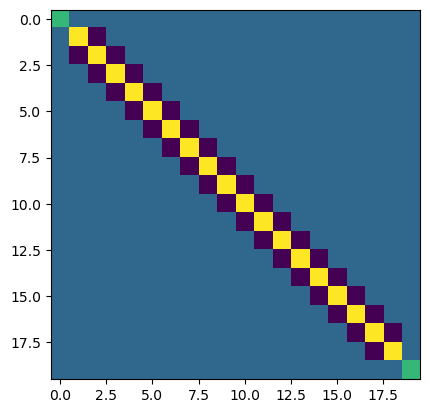

In [539]:
plt.imshow(M_mtrx)

In [540]:
Q[:,0] = np.sin(np.pi*x[:])

In [541]:
Matrix_plus = K_mtrx + (alpha**2)*(dt/2)*M_mtrx
Matrix_minus = K_mtrx - (alpha**2)*(dt/2)*M_mtrx

In [542]:
for n in range(0, T-1):
    rp = (dt/2)*(F_mtrx[:,n]+F_mtrx[:,n+1]) + Matrix_minus.dot(Q[:,n])   
    Q[:,n+1] = np.linalg.solve(Matrix_plus, rp)

In [543]:
psi_vec = np.zeros((N,N))
for i in range(0, N):
    for n in range(0,N):
        psi_vec[i,n] = psi(x[i], x, n, N, h)

In [544]:
u = np.zeros((N,T))
for i in range(0, N):
    for n in range(0, T):
        u[:,n] = u[:,n] + Q[i,n] * psi_vec[i,:]

Численное решение

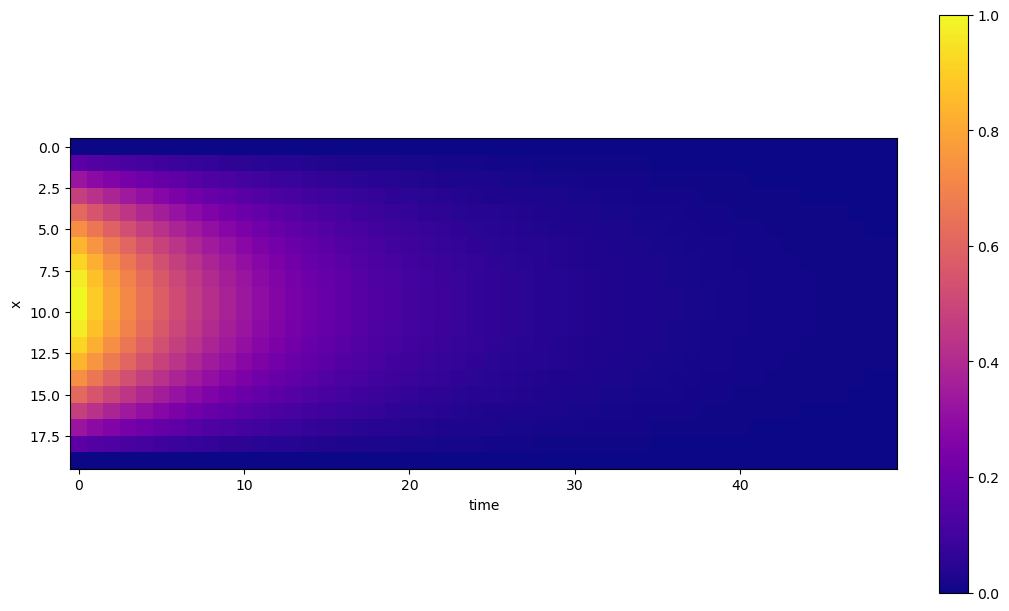

In [545]:
fig, axs = plt.subplots(figsize=(10,6), constrained_layout=True)
p1 = axs.imshow(u, cmap='plasma', aspect='equal', vmin=0, vmax=1)
plt.xlabel('time')
plt.ylabel('x')
fig.colorbar(p1)

Аналитическое решение

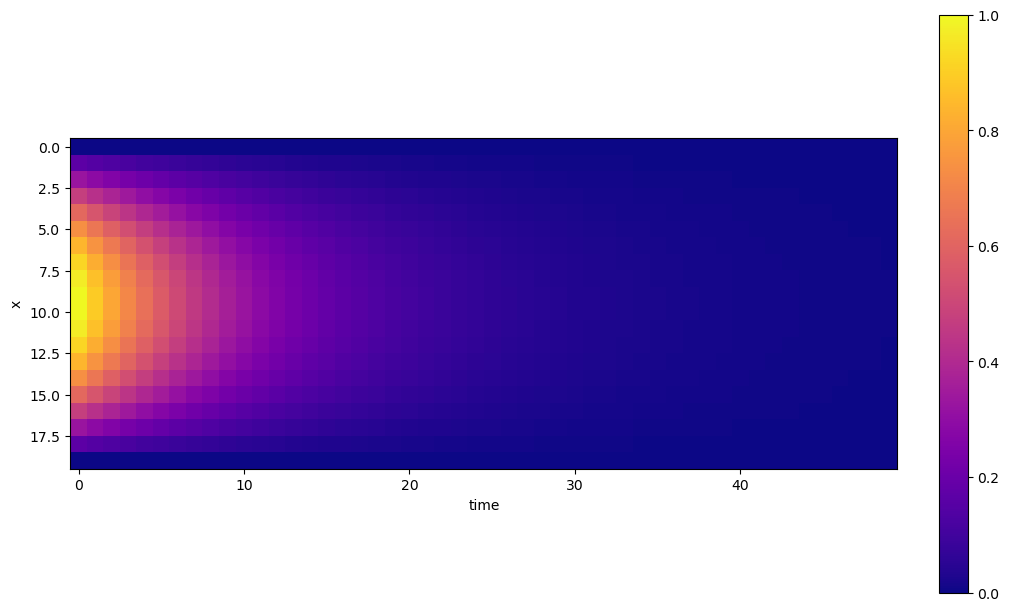

In [546]:
fig, axs = plt.subplots(figsize=(10,6), constrained_layout=True)
p2 = axs.imshow(u_analytical, cmap='plasma', aspect='equal', vmin=0, vmax=1)
plt.xlabel('time')
plt.ylabel('x')
fig.colorbar(p2)

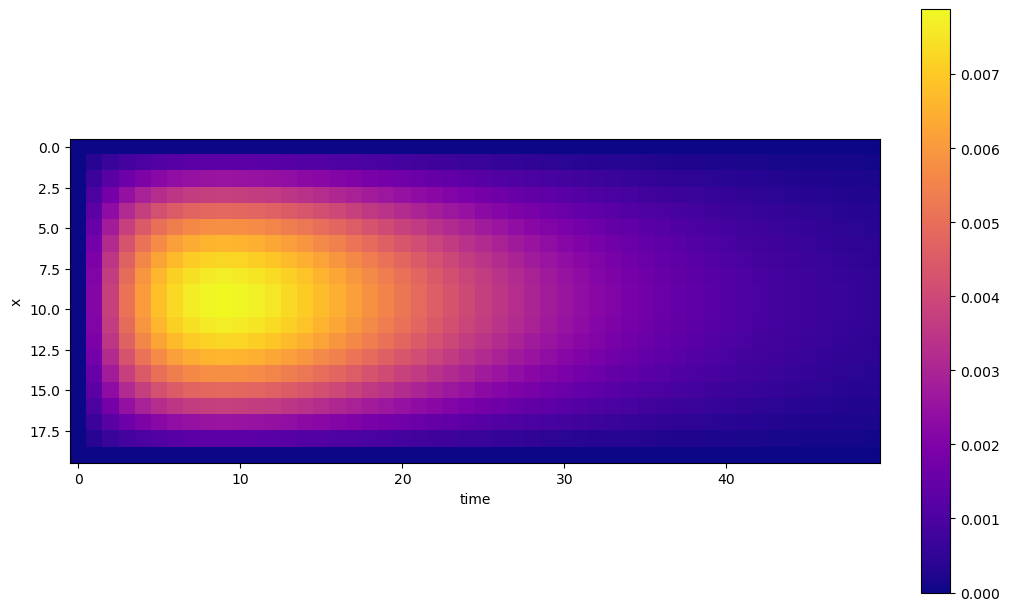

In [547]:
"""невязка"""
fig, axs = plt.subplots(figsize=(10,6), constrained_layout=True)
p2 = axs.imshow(u -u_analytical, cmap='plasma', aspect='equal')
plt.xlabel('time')
plt.ylabel('x')
fig.colorbar(p2)